### Optimal control of phenomenological models, e.g. the model model
This notebook shows how to compute the optimal control (OC) signal for the model model for a simple example task. For the Hopf-model the OC can be computed completely analogously.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')
    os.chdir('..')
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_wc
from neurolib.optimal_control.oc_utils.plot_oc import plot_oc_singlenode, plot_oc_network

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

We stimulate the system with a known control signal, define the resulting activity as target, and compute the optimal control for this target. We define weights such that precision is penalized only (w_p=1, w_2=0). Hence, the optimal control signal should converge to the input signal.

In [2]:
# We import the model
model = WCModel()

# Some parameters to define stimulation signals
dt = model.params["dt"]
duration = 10.
amplitude = 1.
period = duration / 4.

# We define a "zero-input", and a sine-input
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)
input = np.copy(zero_input)
input[0,1:-1] = amplitude * np.sin(2.*np.pi*np.arange(0,duration-0.1, dt)/period) # other functions or random values can be used as well

# We set the duration of the simulation and the initial values
model.params["duration"] = duration
x_init = 0.011225367461896877
y_init = 0.013126741089502588
model.params["exc_init"] = np.array([[x_init]])
model.params["inh_init"] = np.array([[y_init]])

0.011225367461896877
0.013126741089502588


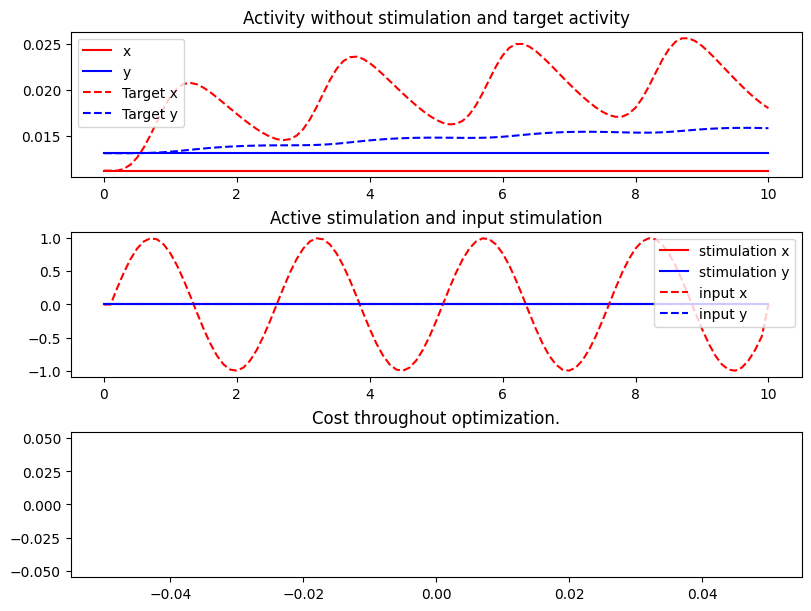

In [3]:
# We set the stimulus in x and y variables, and run the simulation
model.params["exc_ext"] = input
model.params["inh_ext"] = zero_input
model.run()

# Define the result of the stimulation as target
target = np.concatenate((np.concatenate( (model.params["exc_init"], model.params["inh_init"]), axis=1)[:,:, np.newaxis],
    np.stack( (model.exc, model.inh), axis=1)), axis=2)
target_input = np.concatenate( (input,zero_input), axis=0)[np.newaxis,:,:]

# Remove stimuli and re-run the simulation
model.params["exc_ext"] = zero_input
model.params["inh_ext"] = zero_input
control = np.concatenate( (zero_input,zero_input), axis=0)[np.newaxis,:,:]
model.run()

# combine initial value and simulation result to one array
state = np.concatenate((np.concatenate( (model.params["exc_init"], model.params["inh_init"]), axis=1)[:,:, np.newaxis],
    np.stack( (model.exc, model.inh), axis=1)), axis=2)

print(state[0,0,-1])
print(state[0,1,-1])

plot_oc_singlenode(duration, dt, state, target, control, target_input)

Compute control for a deterministic system
Cost in iteration 0: 41.810554198290326
Cost in iteration 1: 7.492202079107222
Cost in iteration 2: 5.485400181064258
Cost in iteration 3: 4.950468333820148
Cost in iteration 4: 4.856542959257796
Cost in iteration 5: 4.322257072275416
Cost in iteration 6: 4.251551576103819
Cost in iteration 7: 3.8980625100240247
Cost in iteration 8: 3.863644919396582
Cost in iteration 9: 3.603375656091847
Cost in iteration 10: 3.1929298052210973
Cost in iteration 11: 3.123258641194341
Cost in iteration 12: 2.751930678006585
Cost in iteration 13: 2.700689316457611
Cost in iteration 14: 2.6895700460798713
Cost in iteration 15: 2.6610702161638584
Cost in iteration 16: 2.463704840701353
Cost in iteration 17: 2.4250550021668555
Cost in iteration 18: 2.340195456113667
Cost in iteration 19: 2.3134318799455764
Cost in iteration 20: 2.17445043097373
Cost in iteration 21: 2.1485681714164677
Cost in iteration 22: 2.130795064720608
Cost in iteration 23: 2.118998525653935


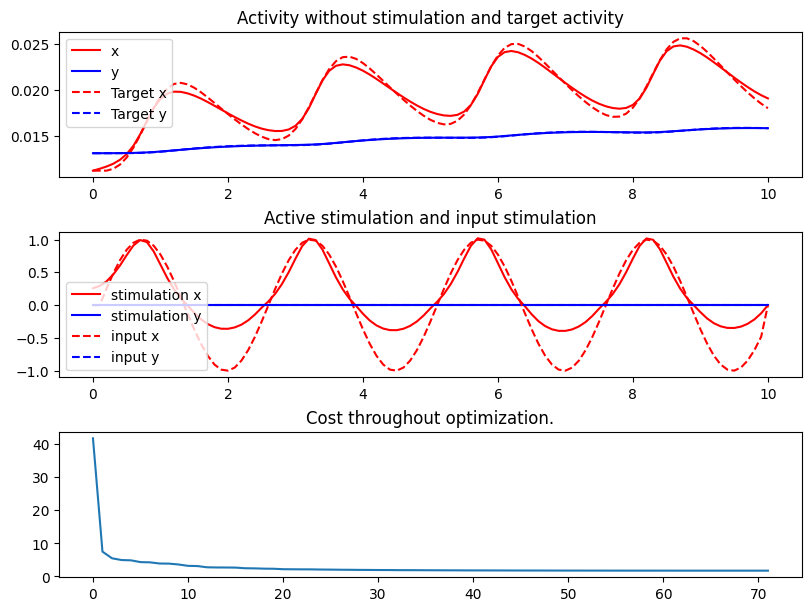

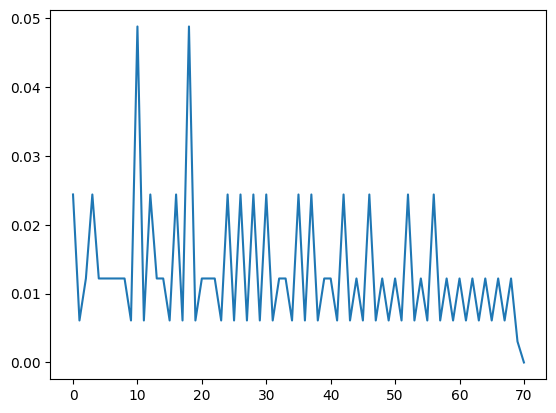

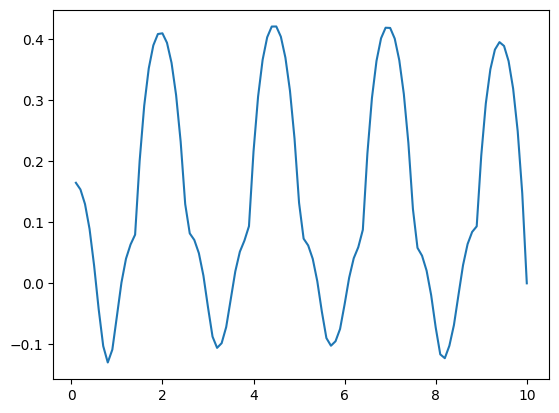

In [42]:
# We load the optimal control class
# print array (optional parameter) defines, for which iterations intermediate results will be printed
# Parameters will be taken from the input model
model.params["exc_ext"] = zero_input
model.params["inh_ext"] = zero_input
controlmat = np.zeros((1,2))
controlmat[0,0] = 1.
model_controlled = oc_wc.OcWc(model, target, w_p=1e5, w_2=0, print_array=np.arange(0,101,1), control_matrix = controlmat)

# We run 500 iterations of the optimal control gradient descent algorithm
model_controlled.step = 100
model_controlled.optimize(100)

state = model_controlled.get_xs()
control = model_controlled.control

plot_oc_singlenode(duration, dt, state, target, control, target_input, model_controlled.cost_history)

plt.plot(model_controlled.step_sizes_history)
plt.show()

plt.plot(model_controlled.model.t, model_controlled.grad[0,0,1:])
plt.show()


Compute control for a deterministic system
L1 cost  0.03708735083652949
Cost in iteration 0: 0.03708735083652949
L1 cost  0.03708735083652949
L1 cost  0.20074440035518734
L1 cost  0.16639878747021283
L1 cost  0.1246993293439749
L1 cost  0.06802713890813461
L1 cost  0.02326673552330568
L1 cost  0.02326673552330568
L1 cost  0.02326673552330568
L1 cost  91.08537767880895
L1 cost  4.920619424163002
L1 cost  0.027855188805179544
L1 cost  0.007284330582478041
L1 cost  0.007284330582478041
L1 cost  0.007284330582478041
L1 cost  1.00239147179406
L1 cost  0.050433862518938624
L1 cost  0.010964185446306224
L1 cost  0.00669778946330769
L1 cost  0.00669778946330769
L1 cost  0.00669778946330769
L1 cost  0.03746801944397857
L1 cost  0.01587696633763045
L1 cost  0.008369012165821145
L1 cost  0.006460323295864783
L1 cost  0.006460323295864783
L1 cost  0.006460323295864783
L1 cost  0.2836316807744638
L1 cost  0.028566508111594384
L1 cost  0.008540467761666021
L1 cost  0.006098394403272934
L1 cost  0.00

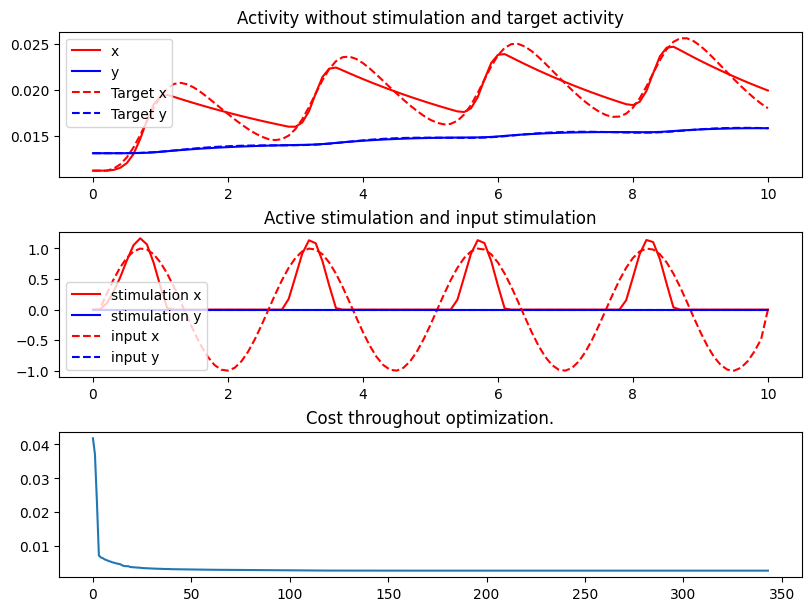

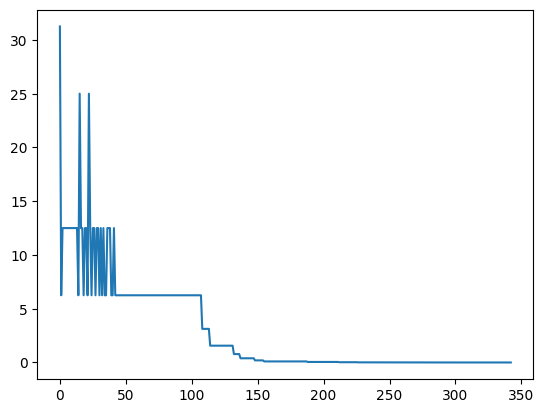

In [11]:
# Do another 100 iterations if you want to.
# Repeated execution will continue with further 100 iterations.
model_controlled.step = 100
model_controlled.optimize(500)
state = model_controlled.get_xs()
control = model_controlled.control
plot_oc_singlenode(duration, dt, state, target, control, target_input, model_controlled.cost_history)

plt.plot(model_controlled.step_sizes_history)
plt.show()

### Network case

Let us know study a simple 2-node network of model oscillators. We first need to define the coupling matrix and the delay matrix. We can then initialize the model.

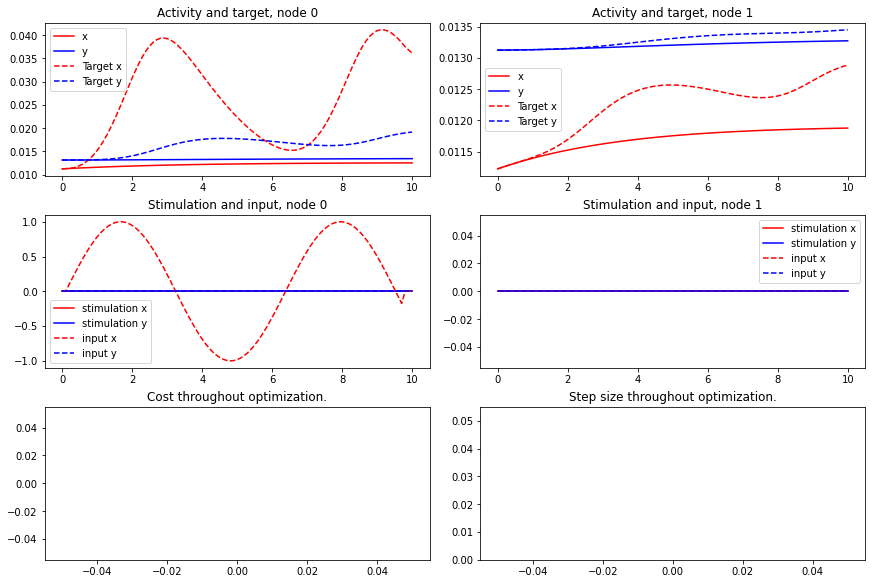

In [69]:
cmat = np.array( [[0., 1.], [0.5, 0.]] )  # diagonal elements are zero, connection strength is 1 (0.5) from node 0 to node 1 (from node 1 to node 0)
dmat = np.array( [[0., 0.], [0., 0.]] )  # no delay

model = WCModel(Cmat=cmat, Dmat=dmat)
model.params.coupling = "additive" # use additive coupling

# we define the control input matrix to enable or disable certain channels and nodes
control_mat = np.zeros( (model.params.N, len(model.state_vars)) )
control_mat[0,0] = 1. # only allow inputs in y-channel in node 0

model.params.K_gl = 5.

model.params["duration"] = duration
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)
input = np.copy(zero_input)
input[0,1:-3] = np.sin(np.arange(0,duration-0.3, dt)) # other functions or random values can be used as well
model.params["exc_init"] = np.vstack( [x_init, x_init] )
model.params["inh_init"] = np.vstack( [y_init, y_init] )


# We set the stimulus in x and y variables, and run the simulation
input_nw = np.concatenate( (np.vstack( [control_mat[0,0] * input, control_mat[0,1] * input] )[np.newaxis,:,:],
                            np.vstack( [control_mat[1,0] * input, control_mat[1,1] * input] )[np.newaxis,:,:]), axis=0)
zero_input_nw = np.concatenate( (np.vstack( [zero_input, zero_input] )[np.newaxis,:,:],
                                 np.vstack( [zero_input, zero_input] )[np.newaxis,:,:]), axis=0)

model.params["exc_ext"] = input_nw[:,0,:]
model.params["inh_ext"] = input_nw[:,1,:]

model.run()

# Define the result of the stimulation as target
target = np.concatenate( (np.concatenate( (model.params["exc_init"], model.params["inh_init"]), axis=1)[:,:, np.newaxis], np.stack( (model.exc, model.inh), axis=1)), axis=2)

# Remove stimuli and re-run the simulation
model.params["exc_ext"] = zero_input_nw[:,0,:]
model.params["inh_ext"] = zero_input_nw[:,0,:]
model.run()

# combine initial value and simulation result to one array
state =  np.concatenate( (np.concatenate( (model.params["exc_init"], model.params["inh_init"]), axis=1)[:,:, np.newaxis], np.stack( (model.exc, model.inh), axis=1)), axis=2)

plot_oc_network(model.params.N, duration, dt, state, target, zero_input_nw, input_nw)

In [70]:
prec_mat = np.zeros( (model.params.N, len(model.output_vars)) )
prec_mat[1,0] = 1. # only measure in y-channel in node 1

model.params["exc_ext"] = zero_input_nw[:,0,:]
model.params["inh_ext"] = zero_input_nw[:,0,:]
model_controlled = oc_wc.OcWc(model, target, w_p=1, w_2=0, print_array=[1,2,10,50,100,200,300,400,500], control_matrix=control_mat, precision_matrix=prec_mat)

#model_controlled.step = 100
model_controlled.optimize(2)

state = model_controlled.get_xs()
control = model_controlled.control

plot_oc_network(model.params.N, duration, dt, state, target, control, input_nw, model_controlled.cost_history, model_controlled.step_sizes_history)

plt.plot(model_controlled.step_sizes_history)
plt.show()

increase step because wc
Compute control for a deterministic system
Cost in iteration 1: 1.9071368254787637e-05


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(float64, UniTuple(int64 x 2))
 
There are 22 candidate implementations:
[1m    - Of which 22 did not match due to:
    Overload of function 'getitem': File: <numerous>: Line N/A.
      With argument(s): '(float64, UniTuple(int64 x 2))':[0m
[1m     No match.[0m
[0m
[0m[1mDuring: typing of intrinsic-call at /home/lena/Promotion/neurolib/neurolib/optimal_control/oc_wc/oc_wc.py (159)[0m
[1m
File "neurolib/optimal_control/oc_wc/oc_wc.py", line 159:[0m
[1mdef compute_nw_input(N, T, K_gl, cmat, dmat, E):
    <source elided>
            continue
[1m        for n in range(N):
[0m        [1m^[0m[0m

[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function compute_nw_input at 0x7f44e3393ee0>))[0m
[0m[1mDuring: typing of call at /home/lena/Promotion/neurolib/neurolib/optimal_control/oc_wc/oc_wc.py (203)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function compute_nw_input at 0x7f44e3393ee0>))[0m
[0m[1mDuring: typing of call at /home/lena/Promotion/neurolib/neurolib/optimal_control/oc_wc/oc_wc.py (203)
[0m
[1m
File "neurolib/optimal_control/oc_wc/oc_wc.py", line 203:[0m
[1mdef compute_hx_nw(K_gl, cmat, N, V, T):
    <source elided>

[1m
[0m [1m^[0m[0m


Compute control for a deterministic system
Cost in iteration 1: 1.0953661598084045e-05
Cost in iteration 2: 1.087825204254886e-05
Cost in iteration 10: 1.036206184723746e-05
Cost in iteration 50: 8.224560285336917e-06
Cost in iteration 100: 6.279369320742075e-06


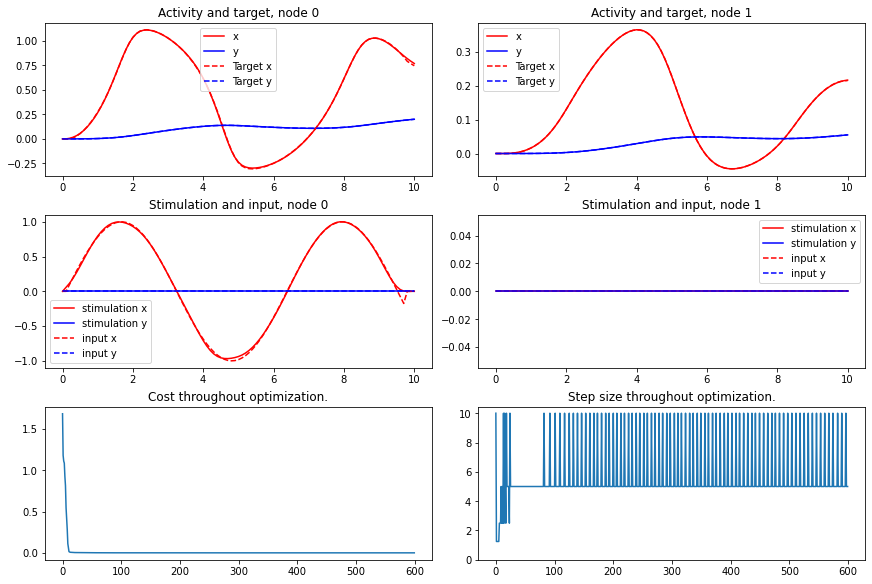

In [ ]:
# Do another 100 iterations if you want to.
# Repeated execution will continue with further 100 iterations.
model_controlled.optimize(100)
state = model_controlled.get_xs()
control = model_controlled.control
plot_oc_network(model.params.N, duration, dt, state, target, control, input_nw, model_controlled.cost_history, model_controlled.step_sizes_history)